In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diamonds= pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
diamonds.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
diamonds.missing_values = diamonds.isnull().sum()
print(diamonds.missing_values)

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_1980\4133768140.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  diamonds.missing_values = diamonds.isnull().sum()


In [5]:
diamonds.drop(['Unnamed: 0'], axis=1, inplace=True)

# EDA

In [6]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
diamonds['cut'] = labelencoder.fit_transform(diamonds['cut'])
diamonds['color'] = labelencoder.fit_transform(diamonds['color'])
diamonds['clarity'] = labelencoder.fit_transform(diamonds['clarity'])
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# volume = (carat * 200) / 3.52
diamonds['volume'] = (diamonds['carat']*200)/3.52
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,13.068182
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,11.931818
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,13.068182
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,16.477273
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,17.613636


In [8]:
diamonds.drop(['x', 'y', 'z'], axis=1, inplace=True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,13.068182
1,0.21,3,1,2,59.8,61.0,326,11.931818
2,0.23,1,1,4,56.9,65.0,327,13.068182
3,0.29,3,5,5,62.4,58.0,334,16.477273
4,0.31,1,6,3,63.3,58.0,335,17.613636


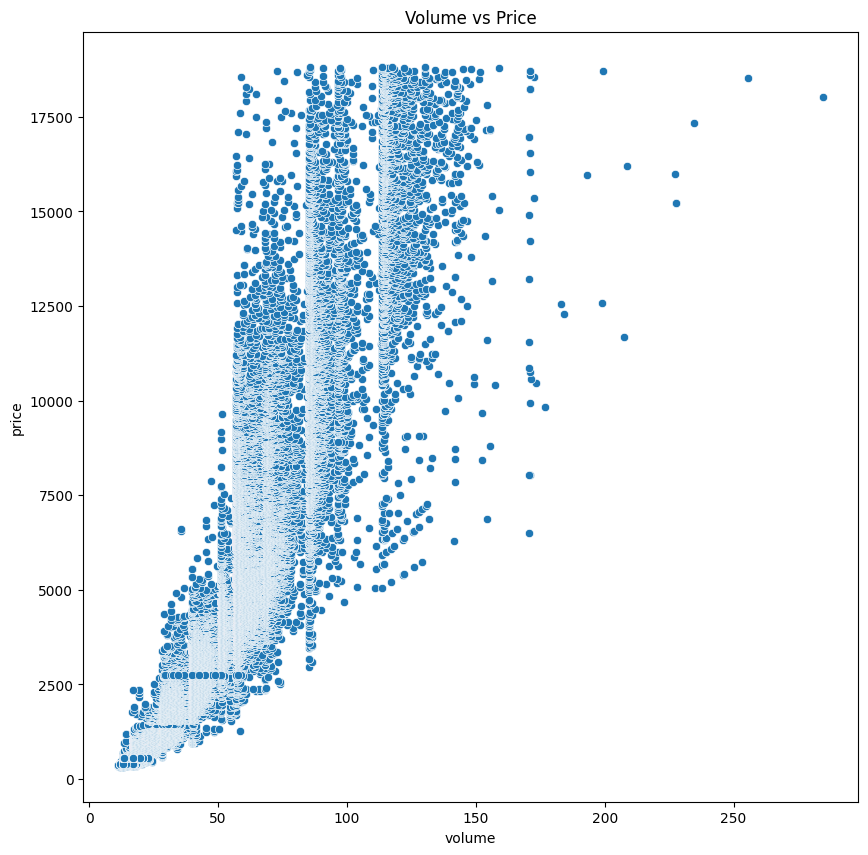

In [9]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='volume', y='price', data=diamonds)
plt.title('Volume vs Price')
plt.show()

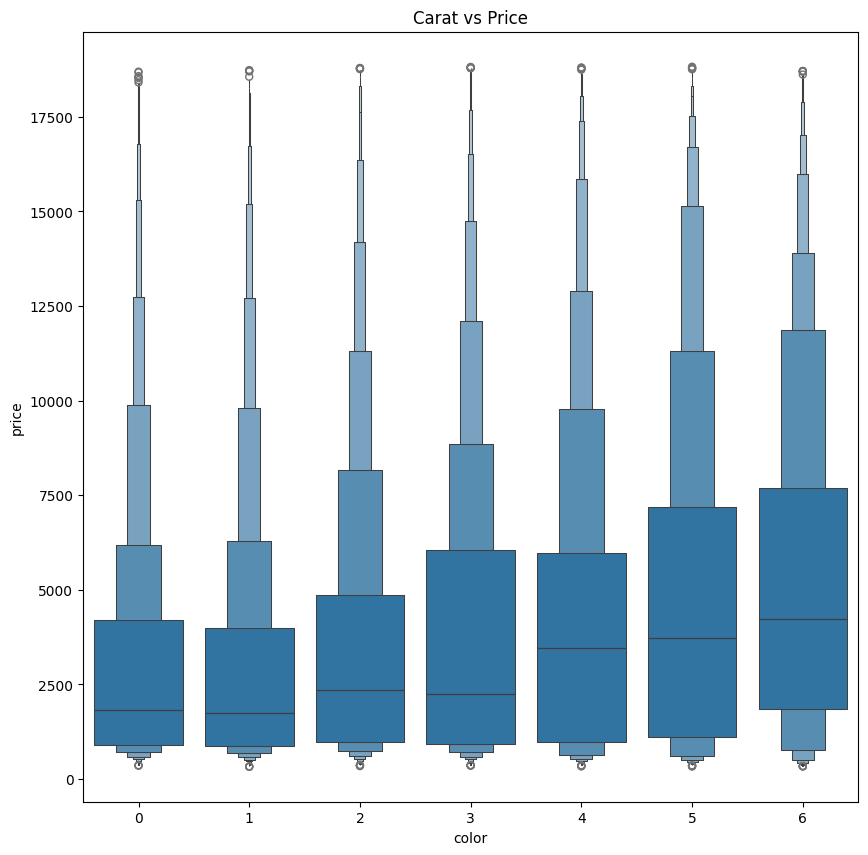

In [10]:
plt.figure(figsize=(10,10))
sns.boxenplot(x='color', y='price', data=diamonds)
plt.title('Carat vs Price')
plt.show()

# Creat The Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [15]:
x = diamonds.drop(['price'], axis=1)
y = diamonds['price']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_train, y_train)
print('linear regression Score: ', score)

linear regression Score:  0.8800140346433769


In [22]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('R2 Score: ', r2)
print('Mean Squared Error: ', mse)

R2 Score:  0.8814307614921378
Mean Squared Error:  1879521.6673695792


In [24]:
Lasso_model = Lasso()
Lasso_model.fit(x_train, y_train)
score = Lasso_model.score(x_train, y_train)
print('Lasso Score: ', score)

Lasso Score:  0.880043398436719


In [25]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
score = ridge_model.score(x_train, y_train)
print('Ridge Score: ', score)

Ridge Score:  0.8800439300078432


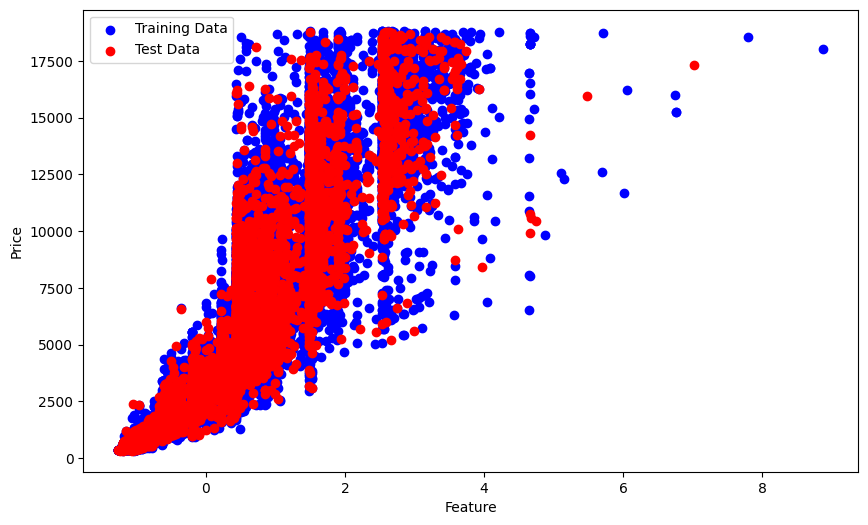

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train[:, 0], y_train, color='blue', label='Training Data')
plt.scatter(x_test[:, 0], y_test, color='red', label='Test Data')

plt.xlabel('Feature')
plt.ylabel('Price')
plt.legend()
plt.show()
